In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scienceplots
%matplotlib inline
from typing import Union, Tuple, List, Dict

import sys
sys.path.append("../../../src")

import nanonets_utils

data_folder = "/home/j/j_mens07/phd/data/1_funding_period/potential/system_size/"

In [35]:
# Parameter
N_min   = 3
N_max   = 16
N_keys  = N_max-N_min+1
N_vals  = [i for i in range(N_min,N_max+1)]
N_e     = 8

data        = nanonets_utils.load_boolean_results(folder=data_folder, N=N_vals, N_e=N_e, input_cols=['E1','E3'])
fitness     = {N : nanonets_utils.fitness(df=data[N], input_cols=['E1','E3'], delta=0.0) for N in N_vals}
abundance   = {N : nanonets_utils.abundance(df=fitness[N]) for N in N_vals}

In [5]:
def abundance_multiplot(data: Dict, gates: List[str] = ['AND', 'OR', 'XOR', 'XNOR', 'NAND', 'NOR'], 
    dpi: int = 200, x_limits: List[float] = [0.45, 10], y_limits: List[float] = [0.1, 100], 
    xlabel: str = 'Fitness', ylabel: str = 'Abundance', n_rows=2, n_cols=3, colormap='coolwarm') -> Tuple[plt.Figure, plt.Axes]:

    marker  = ['o','s','^','<','>','v','P']
    cmap    = plt.get_cmap(colormap)
    N_vals  = len(data.keys())

    with plt.style.context(["science","bright","grid"]):
        
        fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, dpi=dpi, layout='constrained')
        fig.set_figwidth(fig.get_figwidth()*1.5)
        fig.set_figheight(fig.get_figheight()*1)

        for i, gate in enumerate(gates):
            ax      = axes.flat[i]
            keys    = []
            for j, (key, df) in enumerate(data.items()):
                # ax.plot(df[f'{gate} Fitness'], df[f'{gate} Fitness Abundance'], marker=marker[j % len(marker)],
                #         markevery=0.1, color=cmap((j+1)/N_vals))
                ax.plot(df[f'{gate} Fitness'], df[f'{gate} Fitness Abundance'], color=cmap((j+1)/N_vals))
                keys.append(key)
            ax.set_xlim(x_limits[0], x_limits[1])
            ax.set_ylim(y_limits[0], y_limits[1])
            ax.set_xscale('log')
            ax.set_yscale('log')
            
            if i >= (n_rows-1)*n_cols:
                ax.set_xlabel(xlabel)
            else:
                ax.set_xticklabels("")

            if i % n_cols == 0:
                ax.set_ylabel(ylabel)
            else:
                ax.set_yticklabels("")

            ax.set_title(gate)

        norm    = mpl.colors.Normalize(vmin=np.min(keys)**2, vmax=np.max(keys)**2)
        cbar    = mpl.cm.ScalarMappable(norm=norm, cmap=colormap)
        fig.colorbar(cbar, ax=axes.ravel(), label='$N_{NP}$')

    return fig, ax

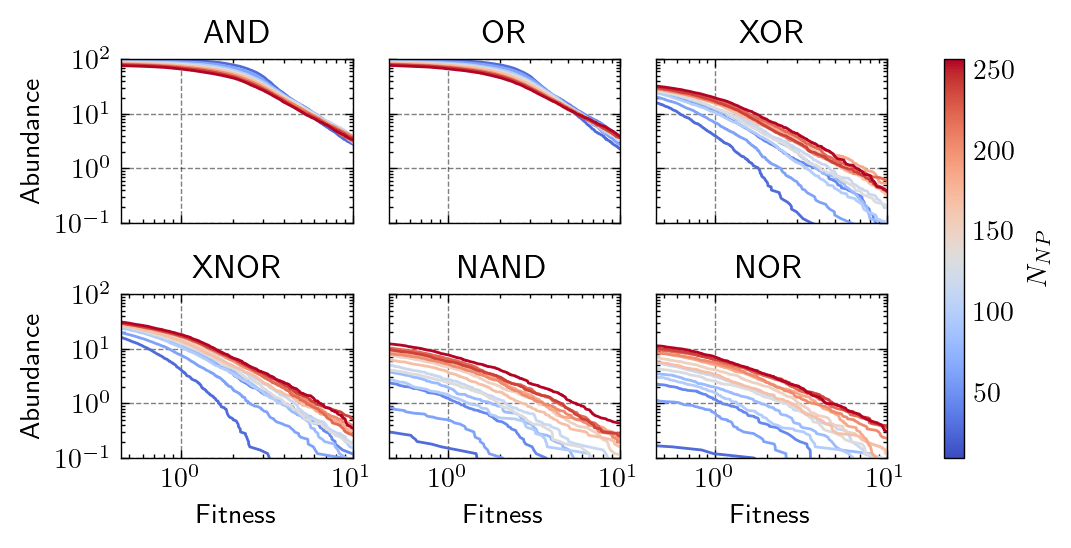

In [6]:
fig, ax = abundance_multiplot(abundance)

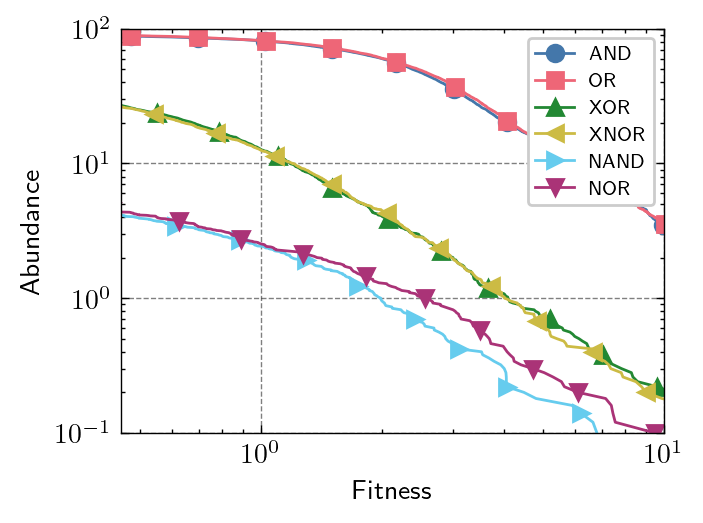

In [33]:
fig, ax = nanonets_utils.abundance_plot(abundance[9])

## Nonlinear Parameter

In [26]:
# Current Relations
params  = {N : nanonets_utils.nonlinear_parameter(data[N]) for i, N in enumerate(N_vals)}

# NDR
Q_ndr_l = np.array([nanonets_utils.return_ndr(params[N]['Ml']) for N in N_vals])
Q_ndr_r = np.array([nanonets_utils.return_ndr(params[N]['Mr']) for N in N_vals])
Q_ndr   = (Q_ndr_l + Q_ndr_r) / 2

# NLS
bins    = 'fd'
Q_nls   = np.array([nanonets_utils.return_nls(df=params[N], bins=bins) for N in N_vals])

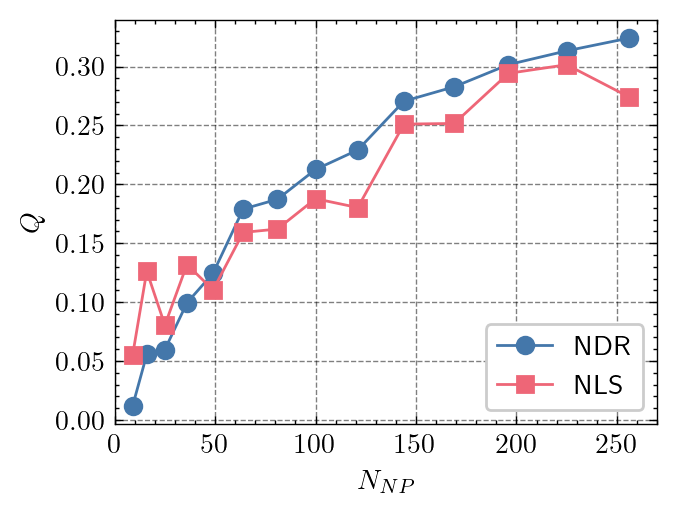

In [27]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    
    ax.plot(np.array(N_vals)**2, Q_ndr, '-o', label='NDR')
    ax.plot(np.array(N_vals)**2, Q_nls, '-s', label='NLS')

    ax.set_xlabel('$N_{NP}$')
    ax.set_ylabel('$Q$')
    ax.legend(loc='lower right')
    ax.set_xlim(0,270)

---

## Relative Error

In [8]:
import seaborn as sns

In [9]:
rel_errors                      = np.array([np.abs((data[key]['Error']/data[key]['Current']).values) for key in data.keys()]).T
rel_errors                      = pd.DataFrame(rel_errors)
rel_errors[rel_errors > 0.1]    = 0.1
rel_errors.columns              = np.array(list(data.keys()))**2
rel_errors

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (14,) + inhomogeneous part.

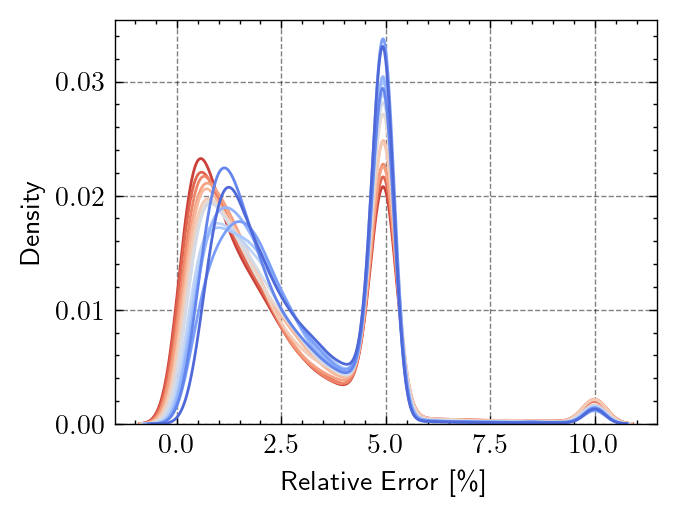

In [10]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax  = sns.kdeplot(rel_errors*100, ax=ax, palette='coolwarm', legend=False, gridsize=1000)
    
    ax.set_xlabel('Relative Error [\%]')

---

## Best Gates

In [39]:
N       = 11
gate    = 'NAND'
best_g  = nanonets_utils.get_best_logic_gate(data[N], fitness[N], gate)

AND


         E0    E1        E2    E3        E4     E5        E6   E7    G  \
0  0.017308  0.00  0.070893  0.00  0.073702  0.038  0.030185  0.0  0.0   
1  0.017308  0.00  0.070893  0.01  0.073702  0.038  0.030185  0.0  0.0   
2  0.017308  0.01  0.070893  0.00  0.073702  0.038  0.030185  0.0  0.0   
3  0.017308  0.01  0.070893  0.01  0.073702  0.038  0.030185  0.0  0.0   

   Eq_Jumps    Jumps   Current     Error  
0  100000.0  50000.0  0.028509  0.000046  
1  100000.0  50000.0  0.028630  0.000026  
2  100000.0  50000.0  0.028664  0.000020  
3  100000.0  50000.0  0.044750  0.000028  
OR


         E0    E1        E2    E3       E4        E5        E6   E7    G  \
0  0.072529  0.00 -0.019257  0.00  0.03537  0.006753 -0.007978  0.0  0.0   
1  0.072529  0.00 -0.019257  0.01  0.03537  0.006753 -0.007978  0.0  0.0   
2  0.072529  0.01 -0.019257  0.00  0.03537  0.006753 -0.007978  0.0  0.0   
3  0.072529  0.01 -0.019257  0.01  0.03537  0.006753 -0.007978  0.0  0.0   

   Eq_Jumps    Jumps  

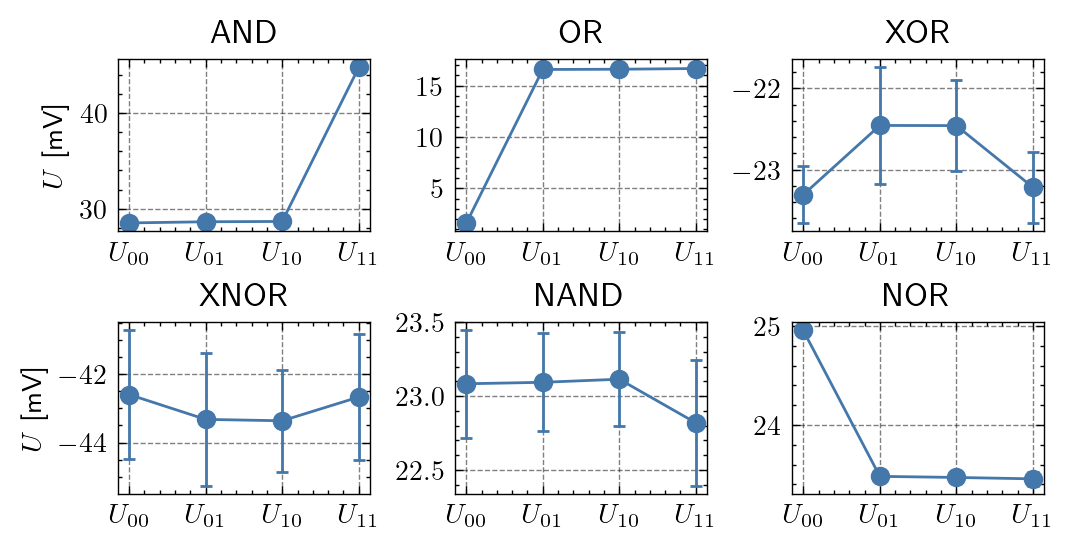

In [43]:
N = 11

with plt.style.context(["science","bright","grid"]):
    
    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*1.5)
    fig.set_figheight(fig.get_figheight()*1)

    for i, gate in enumerate(['AND', 'OR', 'XOR', 'XNOR', 'NAND', 'NOR']):

        best_g  = nanonets_utils.get_best_logic_gate(data[N], fitness[N], gate)
        print(f'{gate}\n\n')
        print(best_g)

        ax  = fig.add_subplot(2,3,i+1)
        ax.errorbar(["$U_{00}$","$U_{01}$","$U_{10}$","$U_{11}$"], best_g['Current']*1000, best_g['Error']*1000, marker='o', capsize=2)
        ax.set_title(gate)

        if i % 3 == 0:
            ax.set_ylabel("$U$ [mV]")